## Домашнее задание 4

In [79]:
import pandas as pd

In [80]:
train_df = pd.read_csv('data/train.csv')

## Описание признаков

In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

*Таблица 1 - Описание признаков исходного датасета*

| Признак                    | Описание                                                                 | Тип данных | Категориальный |
|----------------------------|--------------------------------------------------------------------------|------------|----------------|
| `id`                       | Уникальный идентификатор для каждой записи                               | int64      | Нет            |
| `store_sales(in millions)` | Продажи в магазине в миллионах долларов                                  | float64    | Нет            |
| `unit_sales(in millions)`  | Объем продаж в миллионах единиц в магазине                               | float64    | Да             |
| `total_children`           | Общее количество детей                                                   | float64    | Да             |
| `num_children_at_home`     | Количество детей, проживающих дома, по данным, предоставленным клиентами | float64    | Да             |
| `avg_cars_at home(approx)` | Среднее количество автомобилей                                           | float64    | Да             |
| `gross_weight`             | Общий вес товара                                                         | float64    | Нет            |
| `recyclable_package`       | Указывает, является ли упаковка товара перерабатываемой (0 или 1)        | float64    | Да             |
| `low_fat`                  | Указывает, является ли продукт низкокалорийным (0 или 1)                 | float64    | Да             |
| `units_per_case`           | Количество единиц в упаковке, доступных на полках магазина               | float64    | Нет            |
| `store_sqft`               | Площадь магазина в квадратных футах                                      | float64    | Нет            |
| `coffee_bar`               | Указывает, есть ли в магазине кофейня (0 или 1)                          | float64    | Да             |
| `video_store`              | Указывает, есть ли в магазине видеомагазин или игровая зона (0 или 1)    | float64    | Да             |
| `salad_bar`                | Указывает, есть ли в магазине салат-бар (0 или 1)                        | float64    | Да             |
| `prepared_food`            | Указывает, доступна ли в магазине готовая еда (0 или 1)                  | float64    | Да             |
| `florist`                  | Указывает, есть ли в магазине цветочный отдел (0 или 1)                  | float64    | Да             |
| `cost`                     | Стоимость привлечения клиента в долларах                                 | float64    | Нет            |

**cost - целевая переменная (target)**

In [82]:
train_df.head(10)

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51
5,5,9.08,4.0,5.0,5.0,3.0,7.26,0.0,1.0,5.0,33858.0,1.0,0.0,1.0,1.0,1.0,142.58
6,6,4.80,2.0,1.0,0.0,2.0,9.58,0.0,0.0,6.0,27694.0,1.0,1.0,1.0,1.0,1.0,69.47
7,7,4.29,3.0,2.0,0.0,2.0,16.90,1.0,0.0,2.0,23688.0,1.0,1.0,1.0,1.0,1.0,68.84
8,8,8.55,3.0,5.0,0.0,2.0,13.80,1.0,0.0,6.0,38382.0,0.0,0.0,0.0,0.0,0.0,87.07
9,9,3.08,4.0,1.0,0.0,3.0,15.70,1.0,1.0,9.0,27694.0,1.0,1.0,1.0,1.0,1.0,80.29


## Анализ данных

In [83]:
train_df.describe()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,180167.500000,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,104020.187637,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.000000,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,90083.750000,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,180167.500000,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,270251.250000,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,360335.000000,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [84]:
train_df.shape

(360336, 17)

## Обучение модели на необработанных данных

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

RANDOM_STATE = 42

target = train_df['cost']
features = train_df.drop(columns=['cost'])
display(features.info())
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.2,
                                                                            random_state=RANDOM_STATE)

# Подбор наилучших параметров для метода случайного леса

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [15, 20],
#     'min_samples_split': [10, 15],
#     'min_samples_leaf': [4, 6]
# }
#
# grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=2, n_jobs=15)
# grid_search.fit(features_train, target_train)
# print("Лучшие параметры:", grid_search.best_params_)


model = RandomForestRegressor(
    random_state=42,
    max_depth=15,
    min_samples_leaf=4,
    min_samples_split=15,
    n_estimators=200,
    bootstrap=True,
)

model.fit(features_train, target_train)

train_predictions = model.predict(features_train)
test_predictions = model.predict(features_test)

r2_train = r2_score(target_train, train_predictions)
r2_test = r2_score(target_test, test_predictions)

rmse_train = np.sqrt(mean_squared_error(target_train, train_predictions))
rmse_test = np.sqrt(mean_squared_error(target_test, test_predictions))

display(f"Значение коэффициента детерминации на тренировочной выборке: {r2_train}")
display(f"Значение коэффициента детерминации на тестовой выборке: {r2_test}")
display(f"Значение среднеквадратичной ошибки на тренировочной выборке: {rmse_train}")
display(f"Значение среднеквадратичной ошибки на тестовой выборке: {rmse_test}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

None

'Значение коэффициента детерминации на тренировочной выборке: 0.24206769914208714'

'Значение коэффициента детерминации на тестовой выборке: 0.12199039470688477'

'Значение среднеквадратичной ошибки на тренировочной выборке: 26.05700224318651'

'Значение среднеквадратичной ошибки на тестовой выборке: 28.088166265814912'

## Поиск пропусков

In [86]:
# Проверка на пропуски
missing_values = train_df.isnull().sum()  # Считает количество пропусков в каждом столбце
missing_percentage = (missing_values / len(train_df)) * 100  # Процент пропущенных значений для каждого столбца

# Создаем таблицу с результатами
missing_data = pd.DataFrame({'Количество пропусков': missing_values, 'Процент пропусков': missing_percentage})

# Выводим столбцы, где есть пропуски
missing_data = missing_data[missing_data['Количество пропусков'] > 0]
display(missing_data)

,Количество пропусков,Процент пропусков


## Выявление категориальных признаков

In [87]:
print(train_df.nunique())

id                            360336
store_sales(in millions)        1044
unit_sales(in millions)            6
total_children                     6
num_children_at_home               6
avg_cars_at home(approx).1         5
gross_weight                     384
recyclable_package                 2
low_fat                            2
units_per_case                    36
store_sqft                        20
coffee_bar                         2
video_store                        2
salad_bar                          2
prepared_food                      2
florist                            2
cost                             328
dtype: int64


Преобразуем признаки с малым количеством уникальных значений к категориальным
(признаки `recyclable_package`, `low_fat`, `coffee_bar`, `video_store`, `salad_bar`,
`prepared_food`, `florist` также являются категориальными, но они содержат только два класса -- 
1 и 0, так что их можно считать уже закодированными)

In [88]:
train_df['unit_sales(in millions)'] = train_df['unit_sales(in millions)'].astype('category')
train_df['total_children'] = train_df['total_children'].astype('category')
train_df['num_children_at_home'] = train_df['num_children_at_home'].astype('category')
train_df['avg_cars_at home(approx).1'] = train_df['avg_cars_at home(approx).1'].astype('category')

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   id                          360336 non-null  int64   
 1   store_sales(in millions)    360336 non-null  float64 
 2   unit_sales(in millions)     360336 non-null  category
 3   total_children              360336 non-null  category
 4   num_children_at_home        360336 non-null  category
 5   avg_cars_at home(approx).1  360336 non-null  category
 6   gross_weight                360336 non-null  float64 
 7   recyclable_package          360336 non-null  float64 
 8   low_fat                     360336 non-null  float64 
 9   units_per_case              360336 non-null  float64 
 10  store_sqft                  360336 non-null  float64 
 11  coffee_bar                  360336 non-null  float64 
 12  video_store                 360336 non-null  float64 
 13 

## 6. Кодирование категориальных признаков

In [89]:
from sklearn.preprocessing import OneHotEncoder

# Закодируем с помощью меток
print(train_df.info())
categorical_features = train_df.select_dtypes(include=['category']).columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(train_df[categorical_features])
encoded_data = encoder.transform(train_df[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))
train_df = train_df.drop(columns=categorical_features).reset_index(drop=True)
train_df = pd.concat([train_df, encoded_df], axis=1)

display(train_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   id                          360336 non-null  int64   
 1   store_sales(in millions)    360336 non-null  float64 
 2   unit_sales(in millions)     360336 non-null  category
 3   total_children              360336 non-null  category
 4   num_children_at_home        360336 non-null  category
 5   avg_cars_at home(approx).1  360336 non-null  category
 6   gross_weight                360336 non-null  float64 
 7   recyclable_package          360336 non-null  float64 
 8   low_fat                     360336 non-null  float64 
 9   units_per_case              360336 non-null  float64 
 10  store_sqft                  360336 non-null  float64 
 11  coffee_bar                  360336 non-null  float64 
 12  video_store                 360336 non-null  float64 
 13 

,id,store_sales(in millions),gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,...,num_children_at_home_1.0,num_children_at_home_2.0,num_children_at_home_3.0,num_children_at_home_4.0,num_children_at_home_5.0,avg_cars_at home(approx).1_0.0,avg_cars_at home(approx).1_1.0,avg_cars_at home(approx).1_2.0,avg_cars_at home(approx).1_3.0,avg_cars_at home(approx).1_4.0
0,0,8.61,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,5.00,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,14.08,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,4.02,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,2.13,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 7. Нормализация методом Min-Max

In [90]:
from sklearn.preprocessing import MinMaxScaler

# Выбираем числовые признаки для нормализации
numeric_features = train_df.select_dtypes(include=['int', 'float']).columns

# 1. Min-Max Scaling
scaler_min_max = MinMaxScaler()
df_min_max_scaled = train_df.copy()
scaler_min_max.fit(df_min_max_scaled[numeric_features])
df_min_max_scaled[numeric_features] = scaler_min_max.transform(df_min_max_scaled[numeric_features])
print("Данные после Min-Max нормализации:")
display(df_min_max_scaled.head())

Данные после Min-Max нормализации:


,id,store_sales(in millions),gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,...,num_children_at_home_1.0,num_children_at_home_2.0,num_children_at_home_3.0,num_children_at_home_4.0,num_children_at_home_5.0,avg_cars_at home(approx).1_0.0,avg_cars_at home(approx).1_1.0,avg_cars_at home(approx).1_2.0,avg_cars_at home(approx).1_3.0,avg_cars_at home(approx).1_4.0
0,0.000000,0.361446,0.270440,1.0,0.0,0.885714,0.835527,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000003,0.200357,0.041509,1.0,0.0,0.000000,0.407029,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000006,0.605533,0.962264,1.0,0.0,0.714286,0.046240,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000008,0.156627,0.553459,0.0,1.0,1.000000,0.046240,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000011,0.072289,0.691824,1.0,1.0,0.542857,0.380606,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 8. Новые признаки

In [91]:
df_min_max_scaled['low_fat_ratio'] = df_min_max_scaled['low_fat'] / df_min_max_scaled['units_per_case']
df_min_max_scaled['weight_per_unit'] = df_min_max_scaled['gross_weight'] / df_min_max_scaled['units_per_case']
df_min_max_scaled.head()

,id,store_sales(in millions),gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,...,num_children_at_home_3.0,num_children_at_home_4.0,num_children_at_home_5.0,avg_cars_at home(approx).1_0.0,avg_cars_at home(approx).1_1.0,avg_cars_at home(approx).1_2.0,avg_cars_at home(approx).1_3.0,avg_cars_at home(approx).1_4.0,low_fat_ratio,weight_per_unit
0,0.000000,0.361446,0.270440,1.0,0.0,0.885714,0.835527,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.305336
1,0.000003,0.200357,0.041509,1.0,0.0,0.000000,0.407029,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,inf
2,0.000006,0.605533,0.962264,1.0,0.0,0.714286,0.046240,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.347170
3,0.000008,0.156627,0.553459,0.0,1.0,1.000000,0.046240,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.553459
4,0.000011,0.072289,0.691824,1.0,1.0,0.542857,0.380606,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.842105,1.274412


## Проверка на пропуски и замена на среднее

In [107]:

# Проверка на пропуски
missing_values = df_min_max_scaled.isnull().sum()  # Считает количество пропусков в каждом столбце
missing_percentage = (missing_values / len(df_min_max_scaled)) * 100  # Процент пропущенных значений для каждого столбца

# Создаем таблицу с результатами
missing_data = pd.DataFrame({'Количество пропусков': missing_values, 'Процент пропусков': missing_percentage})

# Выводим столбцы, где есть пропуски
missing_data = missing_data[missing_data['Количество пропусков'] > 0]
display(missing_data)

# Замена пропущенных значений на среднее по каждому столбцу
df_min_max_scaled.fillna(df_min_max_scaled.mean(), inplace=True)

# Удаляем бесконечные значения

df_min_max_scaled.replace([np.inf, -np.inf], np.nan, inplace=True)
df_min_max_scaled.fillna(df_min_max_scaled.median(), inplace=True)

# Проверка, были ли заменены пропуски
missing_values_after_fill = df_min_max_scaled.isnull().sum()
print("После замены пропусков:")
print(missing_values_after_fill)


,Количество пропусков,Процент пропусков


После замены пропусков:
id                                0
store_sales(in millions)          0
gross_weight                      0
recyclable_package                0
low_fat                           0
units_per_case                    0
store_sqft                        0
coffee_bar                        0
video_store                       0
salad_bar                         0
prepared_food                     0
florist                           0
cost                              0
unit_sales(in millions)_1.0       0
unit_sales(in millions)_2.0       0
unit_sales(in millions)_3.0       0
unit_sales(in millions)_4.0       0
unit_sales(in millions)_5.0       0
unit_sales(in millions)_6.0       0
total_children_0.0                0
total_children_1.0                0
total_children_2.0                0
total_children_3.0                0
total_children_4.0                0
total_children_5.0                0
num_children_at_home_0.0          0
num_children_at_home_1.0          0
num_

## Отбор сгенерированных признаков

In [103]:
# Исключаем признаки с низкой корреляцией
correlation_threshold = 0.001

corr_with_target = df_min_max_scaled.corr()['cost'].abs().sort_values(ascending=False)
target_correlation = corr_with_target.drop('cost')
selected_features = target_correlation[target_correlation.abs() > correlation_threshold].index.tolist()

df_selected_features = df_min_max_scaled[selected_features + ['cost']]

display(df_selected_features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   florist                         360336 non-null  float64
 1   video_store                     360336 non-null  float64
 2   prepared_food                   360336 non-null  float64
 3   salad_bar                       360336 non-null  float64
 4   coffee_bar                      360336 non-null  float64
 5   store_sqft                      360336 non-null  float64
 6   unit_sales(in millions)_1.0     360336 non-null  float64
 7   avg_cars_at home(approx).1_0.0  360336 non-null  float64
 8   total_children_2.0              360336 non-null  float64
 9   avg_cars_at home(approx).1_2.0  360336 non-null  float64
 10  avg_cars_at home(approx).1_1.0  360336 non-null  float64
 11  avg_cars_at home(approx).1_4.0  360336 non-null  float64
 12  total_children_1

None

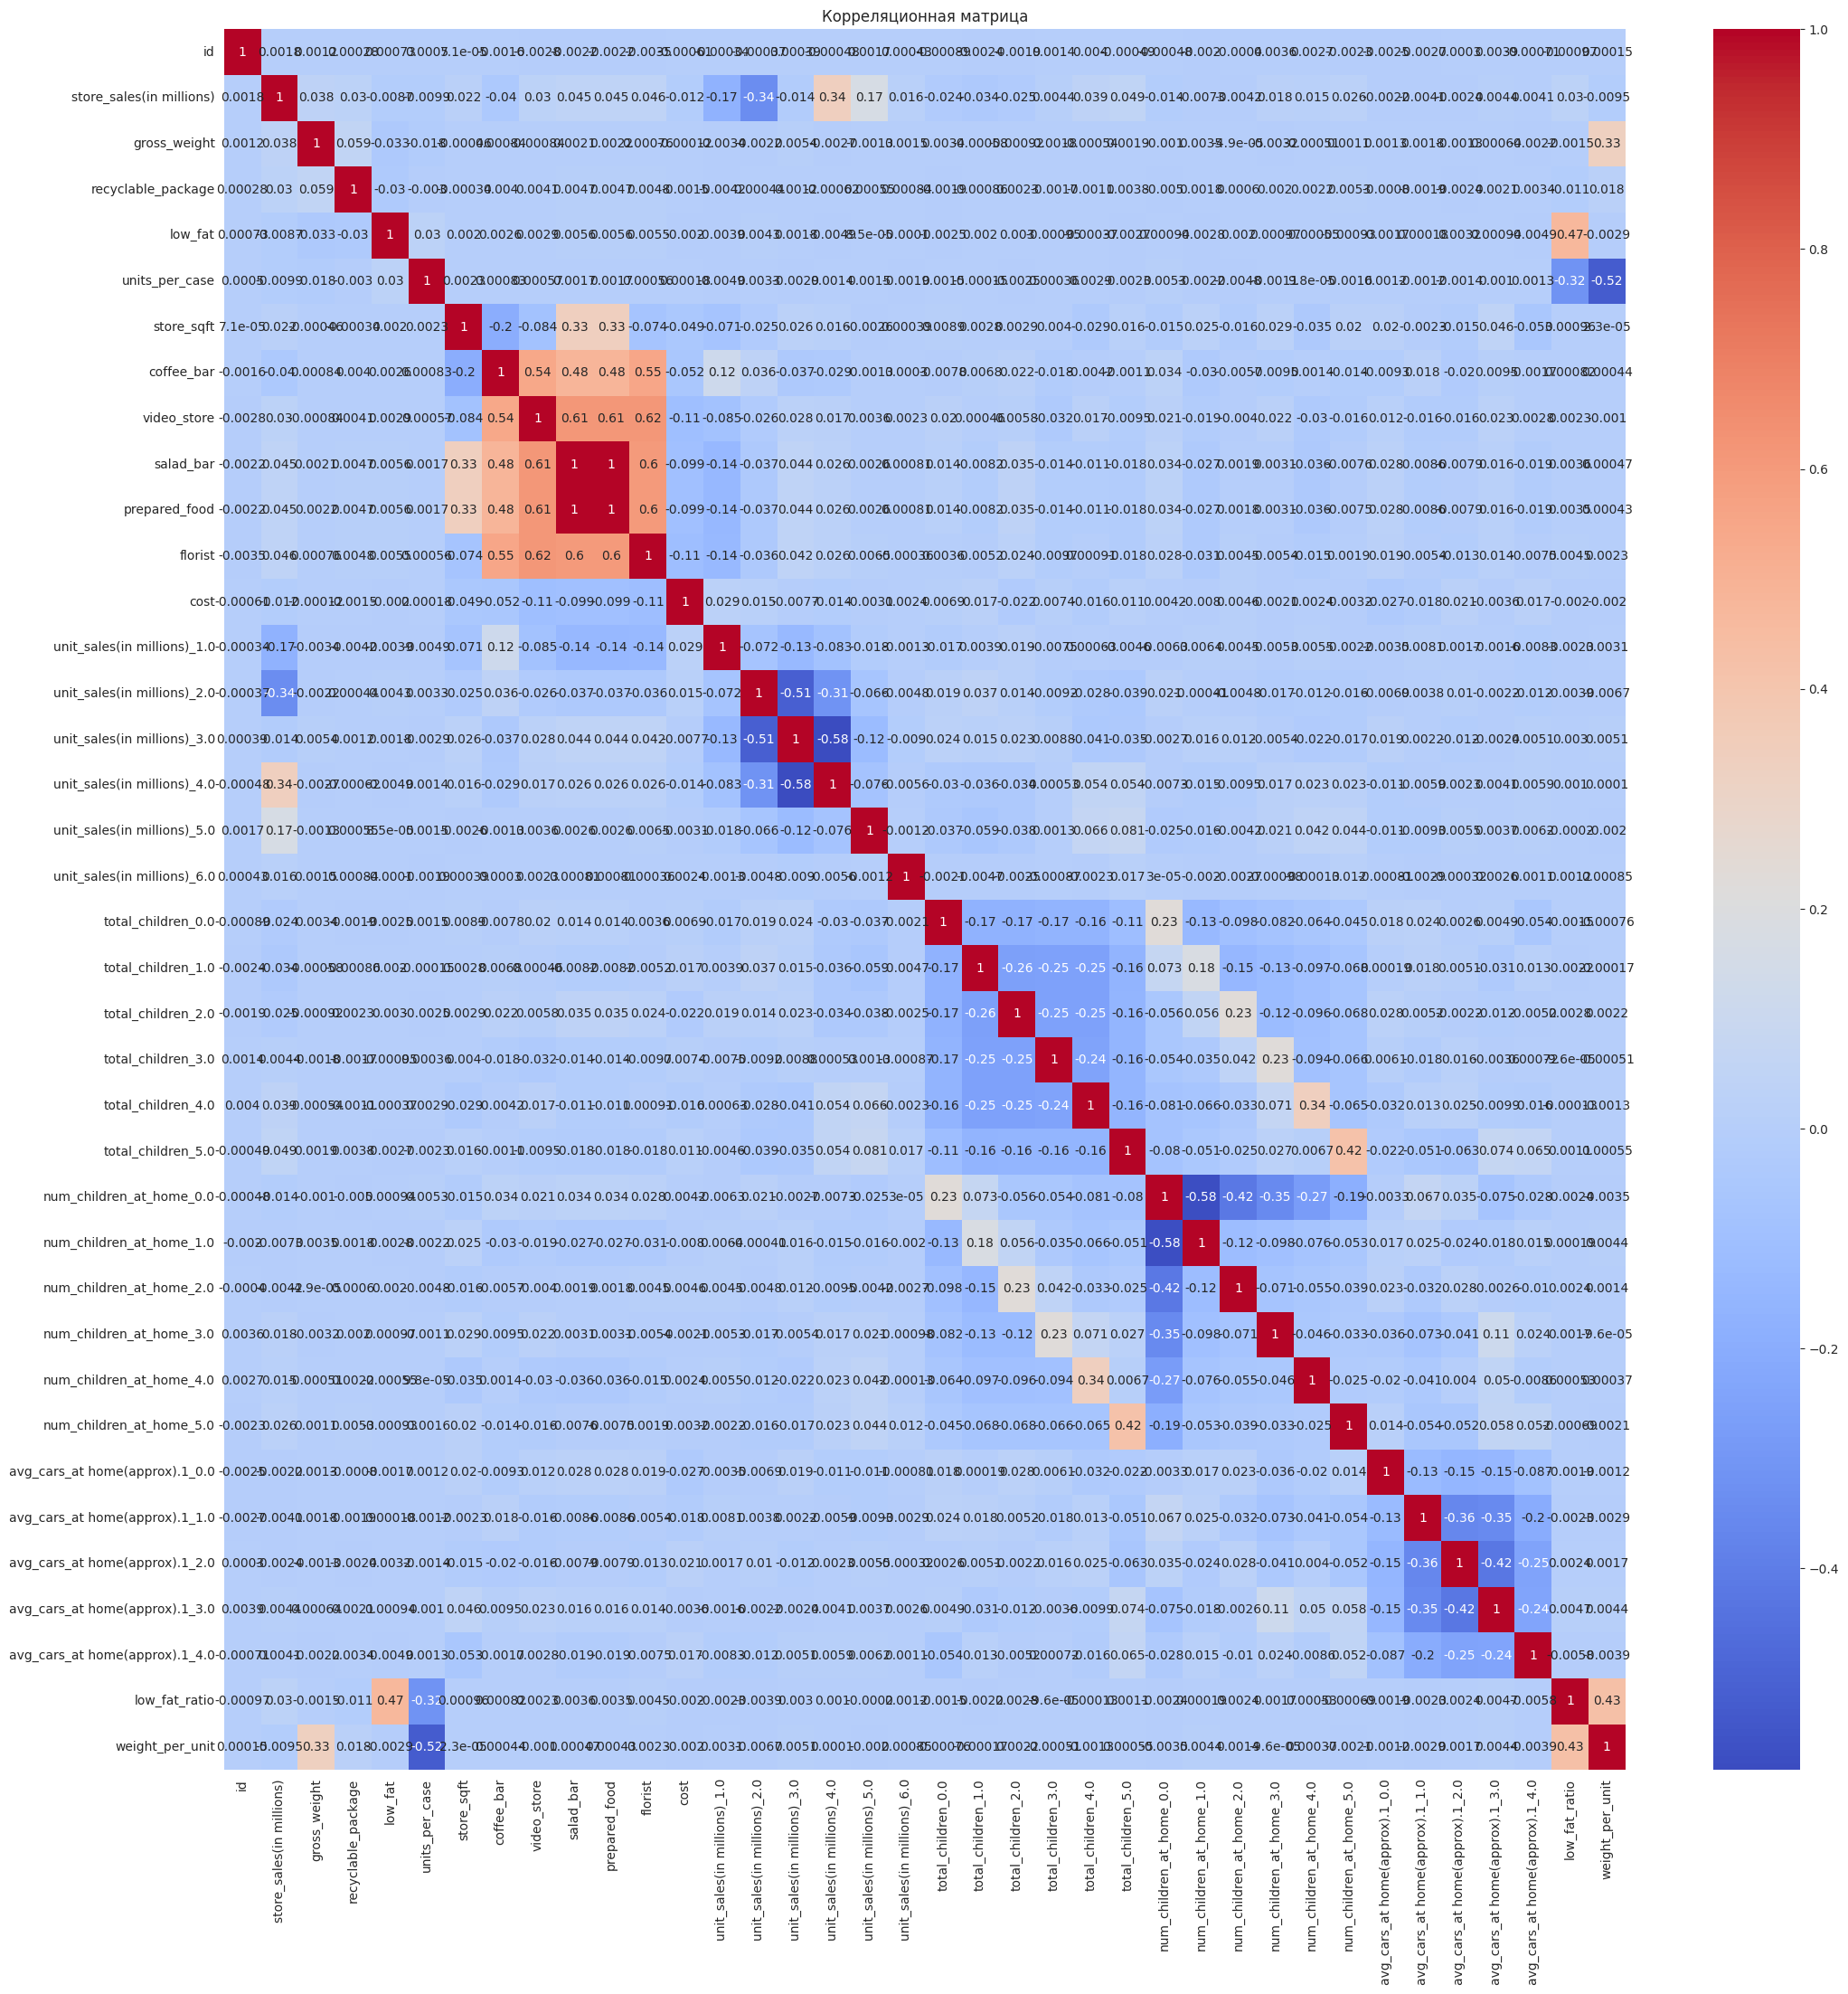

Признаки по значимости (корреляции с 'cost'):
cost                              1.000000
florist                           0.110414
video_store                       0.106786
prepared_food                     0.098843
salad_bar                         0.098810
coffee_bar                        0.052086
store_sqft                        0.049201
unit_sales(in millions)_1.0       0.028804
avg_cars_at home(approx).1_0.0    0.027482
total_children_2.0                0.021578
avg_cars_at home(approx).1_2.0    0.020590
avg_cars_at home(approx).1_1.0    0.017807
avg_cars_at home(approx).1_4.0    0.017319
total_children_1.0                0.016780
total_children_4.0                0.015600
unit_sales(in millions)_2.0       0.015317
unit_sales(in millions)_4.0       0.013571
store_sales(in millions)          0.012387
total_children_5.0                0.010577
num_children_at_home_1.0          0.007992
unit_sales(in millions)_3.0       0.007695
total_children_3.0                0.007380
total_ch

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Корреляционная матрица для оценки значимости
plt.figure(figsize=(25, 25))
sns.heatmap(df_min_max_scaled.corr(), annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()

# Сортировка признаков по их корреляции с целевой переменной 'cost'
corr_with_target = df_selected_features.corr()['cost'].abs().sort_values(ascending=False)
print("Признаки по значимости (корреляции с 'cost'):")
print(corr_with_target)

## Обучаем модель на обработанных данных

In [104]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

target = df_selected_features['cost']
features = df_selected_features.drop(columns=['cost'])
display(features.info())
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.2,
                                                                            random_state=RANDOM_STATE)

from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

model = RandomForestRegressor(
    random_state=42,
    max_depth=15,
    min_samples_leaf=4,
    min_samples_split=15,
    n_estimators=200,
    bootstrap=True,
)

model.fit(features_train, target_train)

train_predictions = model.predict(features_train)
test_predictions = model.predict(features_test)

r2_train = r2_score(target_train, train_predictions)
r2_test = r2_score(target_test, test_predictions)

rmse_train = np.sqrt(mean_squared_error(target_train, train_predictions))
rmse_test = np.sqrt(mean_squared_error(target_test, test_predictions))

print(f"Значение коэффициента детерминации на тренировочной выборке: {r2_train}\n" +
        f"Значение коэффициента детерминации на тестовой выборке: {r2_test}\n" +
        f"Значение среднеквадратичной ошибки на тренировочной выборке: {rmse_train}\n" +
        f"Значение среднеквадратичной ошибки на тестовой выборке: {rmse_test}\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   florist                         360336 non-null  float64
 1   video_store                     360336 non-null  float64
 2   prepared_food                   360336 non-null  float64
 3   salad_bar                       360336 non-null  float64
 4   coffee_bar                      360336 non-null  float64
 5   store_sqft                      360336 non-null  float64
 6   unit_sales(in millions)_1.0     360336 non-null  float64
 7   avg_cars_at home(approx).1_0.0  360336 non-null  float64
 8   total_children_2.0              360336 non-null  float64
 9   avg_cars_at home(approx).1_2.0  360336 non-null  float64
 10  avg_cars_at home(approx).1_1.0  360336 non-null  float64
 11  avg_cars_at home(approx).1_4.0  360336 non-null  float64
 12  total_children_1

None

Значение коэффициента детерминации на тренировочной выборке: 0.22189758425211825
Значение коэффициента детерминации на тестовой выборке: 0.12319409747467369
Значение среднеквадратичной ошибки на тренировочной выборке: 0.26678901134897137
Значение среднеквадратичной ошибки на тестовой выборке: 0.283638904593545



## Поиск выбросов статистическим подходом

In [106]:
for column in df_selected_features.columns:
    if df_selected_features[column].dtype in ['float64', 'int64']:
        Q1 = df_selected_features[column].quantile(0.25)
        Q3 = df_selected_features[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df_selected_features[(df_selected_features[column] < lower_bound) | (df_selected_features[column] > upper_bound)]
        display(f"Выбросы в {column}:", outliers)




'Выбросы в florist:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost


'Выбросы в video_store:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost


'Выбросы в prepared_food:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost


'Выбросы в salad_bar:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost


'Выбросы в coffee_bar:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost


'Выбросы в store_sqft:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost


'Выбросы в unit_sales(in millions)_1.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost
28,0.0,0.0,0.0,0.0,1.0,0.407029,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.056604,1.0,1.750000,0.0,0.717563
37,0.0,0.0,0.0,0.0,1.0,0.220777,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,7.374214,0.0,0.000000,1.0,0.692805
79,0.0,0.0,0.0,0.0,1.0,0.220777,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.843553,1.0,2.187500,1.0,0.692805
163,0.0,0.0,0.0,0.0,1.0,0.407029,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.106918,0.0,0.000000,1.0,0.204022
188,0.0,0.0,0.0,0.0,1.0,0.111421,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.319182,0.0,0.000000,0.0,0.706144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360035,0.0,0.0,0.0,0.0,1.0,0.111421,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.522799,1.0,1.093750,1.0,0.855598
360037,0.0,0.0,0.0,0.0,1.0,0.407029,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.900515,1.0,3.181818,0.0,0.721200
360089,0.0,0.0,0.0,0.0,1.0,0.220777,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.093793,0.0,0.000000,0.0,0.668149
360223,0.0,0.0,0.0,0.0,1.0,0.111421,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.792453,0.0,0.000000,0.0,0.345392


'Выбросы в avg_cars_at home(approx).1_0.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost
3,0.0,0.0,0.0,0.0,1.0,0.046240,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.553459,1.0,1.0,0.0,0.161580
20,1.0,1.0,1.0,1.0,1.0,0.380606,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.750429,0.0,0.0,1.0,0.033549
34,1.0,0.0,0.0,0.0,0.0,0.169221,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.183176,0.0,0.0,1.0,0.183711
52,1.0,1.0,1.0,1.0,1.0,0.529752,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.705975,0.0,0.0,1.0,0.180275
122,0.0,0.0,0.0,0.0,1.0,0.407029,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.851887,0.0,0.0,1.0,0.826698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360253,0.0,0.0,1.0,1.0,0.0,1.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.120591,0.0,0.0,0.0,0.004850
360288,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.176101,0.0,0.0,1.0,0.190582
360291,0.0,0.0,1.0,1.0,0.0,0.746865,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.500000,0.0,0.0,0.0,0.876718
360301,1.0,0.0,0.0,0.0,0.0,0.169221,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.349467,0.0,0.0,1.0,0.932195


'Выбросы в total_children_2.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost
0,0.0,0.0,0.0,0.0,0.0,0.835527,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.305336,0.0,0.000000,1.0,0.114188
7,1.0,1.0,1.0,1.0,1.0,0.173866,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,23.993711,0.0,0.000000,1.0,0.182397
13,1.0,0.0,0.0,0.0,0.0,0.169221,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.255685,0.0,0.000000,1.0,0.860247
19,1.0,1.0,1.0,1.0,1.0,0.380606,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.196336,0.0,0.000000,0.0,0.298100
30,1.0,1.0,1.0,1.0,1.0,0.173866,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.364583,1.0,1.093750,0.0,0.182397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360305,1.0,0.0,0.0,0.0,0.0,0.169221,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.908019,0.0,0.000000,1.0,0.109741
360306,0.0,0.0,0.0,0.0,0.0,0.168963,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.334265,1.0,1.296296,1.0,0.559923
360312,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.628006,0.0,0.000000,0.0,0.993230
360328,0.0,0.0,0.0,0.0,1.0,0.046240,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.204053,0.0,0.000000,0.0,0.409155


'Выбросы в avg_cars_at home(approx).1_2.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost


'Выбросы в avg_cars_at home(approx).1_1.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost
17,1.0,1.0,1.0,1.0,1.0,0.144140,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.651572,1.0,1.400000,1.0,0.947352
18,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.440252,0.0,0.000000,0.0,0.762429
21,0.0,0.0,0.0,0.0,1.0,0.111421,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.933637,1.0,1.206897,1.0,0.745453
26,0.0,0.0,1.0,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.528302,0.0,0.000000,0.0,0.175424
29,1.0,1.0,1.0,1.0,1.0,0.144140,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.823270,0.0,0.000000,1.0,0.522231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360306,0.0,0.0,0.0,0.0,0.0,0.168963,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.334265,1.0,1.296296,1.0,0.559923
360316,1.0,1.0,1.0,1.0,1.0,0.144140,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.455276,0.0,0.000000,0.0,0.267280
360322,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.141509,1.0,35.000000,0.0,0.889450
360323,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.942414,0.0,0.000000,1.0,0.165825


'Выбросы в avg_cars_at home(approx).1_4.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost
14,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.963999,0.0,0.000000,1.0,0.165825
27,1.0,0.0,1.0,1.0,1.0,0.177530,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.163260,0.0,0.000000,0.0,0.718876
33,0.0,0.0,1.0,1.0,0.0,0.746865,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.432914,1.0,1.166667,1.0,0.600040
35,1.0,1.0,1.0,1.0,1.0,0.380606,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.402516,0.0,0.000000,0.0,0.940178
40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.557193,0.0,0.000000,1.0,0.878234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360314,0.0,0.0,1.0,1.0,0.0,0.746865,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.513365,1.0,2.187500,1.0,0.456649
360318,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.738069,0.0,0.000000,1.0,0.615501
360328,0.0,0.0,0.0,0.0,1.0,0.046240,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.204053,0.0,0.000000,0.0,0.409155
360329,1.0,0.0,1.0,1.0,1.0,0.173866,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.027254,0.0,0.000000,1.0,0.354588


'Выбросы в total_children_1.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost
6,1.0,1.0,1.0,1.0,1.0,0.380606,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.576101,0.0,0.000000,0.0,0.188763
9,1.0,1.0,1.0,1.0,1.0,0.380606,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.669025,1.0,4.375000,1.0,0.298100
12,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.580582,0.0,0.000000,0.0,0.762429
15,0.0,0.0,0.0,0.0,1.0,0.046240,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.326638,0.0,0.000000,1.0,0.501718
24,1.0,1.0,1.0,1.0,1.0,0.173866,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.152987,1.0,1.750000,1.0,0.452304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360314,0.0,0.0,1.0,1.0,0.0,0.746865,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.513365,1.0,2.187500,1.0,0.456649
360322,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.141509,1.0,35.000000,0.0,0.889450
360324,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.595912,1.0,2.916667,0.0,0.762429
360325,1.0,1.0,1.0,1.0,1.0,0.540744,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.364583,1.0,1.093750,0.0,0.404002


'Выбросы в total_children_4.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost
1,0.0,0.0,0.0,0.0,1.0,0.407029,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.998990,0.0,1.342146,1.0,0.717563
11,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.786164,1.0,11.666667,1.0,0.893290
21,0.0,0.0,0.0,0.0,1.0,0.111421,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.933637,1.0,1.206897,1.0,0.745453
22,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.320755,0.0,0.000000,0.0,0.615501
36,1.0,1.0,1.0,1.0,1.0,0.540744,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.211062,0.0,0.000000,0.0,0.150667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360317,0.0,0.0,0.0,0.0,0.0,0.513444,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.998990,0.0,1.342146,1.0,0.087005
360319,1.0,0.0,1.0,1.0,1.0,0.177530,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.366614,0.0,0.000000,1.0,0.718876
360320,1.0,1.0,1.0,1.0,1.0,0.380606,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.333333,1.0,5.000000,0.0,0.091653
360326,1.0,1.0,1.0,1.0,1.0,0.173866,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.935535,1.0,2.187500,1.0,0.164915


'Выбросы в unit_sales(in millions)_2.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost
1,0.0,0.0,0.0,0.0,1.0,0.407029,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.998990,0.0,1.342146,1.0,0.717563
6,1.0,1.0,1.0,1.0,1.0,0.380606,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.576101,0.0,0.000000,0.0,0.188763
16,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.735849,0.0,0.000000,1.0,0.454224
24,1.0,1.0,1.0,1.0,1.0,0.173866,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.152987,1.0,1.750000,1.0,0.452304
27,1.0,0.0,1.0,1.0,1.0,0.177530,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.163260,0.0,0.000000,0.0,0.718876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360327,0.0,0.0,0.0,0.0,1.0,0.111421,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.996855,0.0,0.000000,1.0,0.570028
360328,0.0,0.0,0.0,0.0,1.0,0.046240,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.204053,0.0,0.000000,0.0,0.409155
360329,1.0,0.0,1.0,1.0,1.0,0.173866,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.027254,0.0,0.000000,1.0,0.354588
360330,0.0,0.0,0.0,0.0,0.0,0.168963,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.235849,1.0,1.666667,0.0,0.691896


'Выбросы в unit_sales(in millions)_4.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost


'Выбросы в store_sales(in millions):'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost
85,1.0,0.0,0.0,0.0,0.0,0.169221,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.444575,0.0,0.000000,1.0,0.932195
145,0.0,0.0,0.0,0.0,0.0,0.168963,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.375029,1.0,1.296296,0.0,0.922595
326,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.378931,0.0,0.000000,0.0,0.903395
402,1.0,1.0,1.0,1.0,1.0,0.144140,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.248428,0.0,0.000000,0.0,0.947352
458,1.0,0.0,1.0,1.0,1.0,0.177530,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.003387,1.0,1.346154,1.0,0.150465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359572,1.0,1.0,1.0,1.0,1.0,0.540744,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.065872,0.0,0.000000,1.0,0.485247
359638,1.0,0.0,0.0,0.0,0.0,0.169221,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.346154,0.0,0.000000,1.0,0.515865
359845,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.673326,1.0,2.058824,0.0,0.889450
359848,0.0,0.0,1.0,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,21.352201,0.0,0.000000,1.0,0.795372


'Выбросы в total_children_5.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost
3,0.0,0.0,0.0,0.0,1.0,0.046240,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.553459,1.0,1.000000,0.0,0.161580
4,1.0,1.0,1.0,1.0,1.0,0.380606,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.274412,1.0,1.842105,1.0,0.613581
5,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.693396,1.0,8.750000,0.0,0.927546
8,0.0,0.0,0.0,0.0,0.0,0.932188,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.433962,0.0,0.000000,1.0,0.366613
17,1.0,1.0,1.0,1.0,1.0,0.144140,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.651572,1.0,1.400000,1.0,0.947352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360281,0.0,0.0,0.0,0.0,1.0,0.046240,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,31.477987,0.0,0.000000,1.0,0.295170
360315,0.0,0.0,0.0,0.0,0.0,0.513444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.524371,0.0,0.000000,1.0,0.427243
360318,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.738069,0.0,0.000000,1.0,0.615501
360330,0.0,0.0,0.0,0.0,0.0,0.168963,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.235849,1.0,1.666667,0.0,0.691896


'Выбросы в num_children_at_home_1.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost
15,0.0,0.0,0.0,0.0,1.0,0.046240,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.326638,0.0,0.000000,1.0,0.501718
19,1.0,1.0,1.0,1.0,1.0,0.380606,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.196336,0.0,0.000000,0.0,0.298100
24,1.0,1.0,1.0,1.0,1.0,0.173866,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.152987,1.0,1.750000,1.0,0.452304
29,1.0,1.0,1.0,1.0,1.0,0.144140,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.823270,0.0,0.000000,1.0,0.522231
34,1.0,0.0,0.0,0.0,0.0,0.169221,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.183176,0.0,0.000000,1.0,0.183711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360295,1.0,1.0,1.0,1.0,1.0,0.380606,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.733753,1.0,1.060606,1.0,0.735853
360296,0.0,0.0,0.0,0.0,1.0,0.111421,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.000000,1.0,0.168957
360299,0.0,0.0,0.0,0.0,0.0,0.513444,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.181818,0.0,0.000000,1.0,0.389854
360309,0.0,0.0,0.0,0.0,1.0,0.046240,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.804835,0.0,0.000000,1.0,0.402082


'Выбросы в unit_sales(in millions)_3.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost


'Выбросы в total_children_3.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost
10,1.0,1.0,1.0,1.0,1.0,0.540744,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.346154,0.0,0.000000,1.0,0.422191
14,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.963999,0.0,0.000000,1.0,0.165825
18,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.440252,0.0,0.000000,0.0,0.762429
27,1.0,0.0,1.0,1.0,1.0,0.177530,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.163260,0.0,0.000000,0.0,0.718876
28,0.0,0.0,0.0,0.0,1.0,0.407029,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.056604,1.0,1.750000,0.0,0.717563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360293,0.0,0.0,0.0,0.0,0.0,0.932188,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.950543,1.0,1.590909,1.0,0.412187
360302,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.093553,0.0,0.000000,0.0,0.903395
360323,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.942414,0.0,0.000000,1.0,0.165825
360327,0.0,0.0,0.0,0.0,1.0,0.111421,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.996855,0.0,0.000000,1.0,0.570028


'Выбросы в total_children_0.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost
2,0.0,0.0,0.0,0.0,1.0,0.046240,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.347170,0.0,0.000000,1.0,0.330639
16,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.735849,0.0,0.000000,1.0,0.454224
20,1.0,1.0,1.0,1.0,1.0,0.380606,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.750429,0.0,0.000000,1.0,0.033549
32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.433962,0.0,0.000000,1.0,0.762429
58,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.100629,0.0,0.000000,0.0,0.580335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360308,1.0,1.0,1.0,1.0,1.0,0.540744,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.576520,1.0,1.666667,1.0,0.150667
360311,0.0,0.0,0.0,0.0,1.0,0.046240,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.315833,0.0,0.000000,1.0,0.295170
360313,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.773585,1.0,3.500000,1.0,0.889450
360321,0.0,0.0,1.0,1.0,0.0,0.746865,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.671384,1.0,3.500000,0.0,0.272130


'Выбросы в num_children_at_home_2.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost
0,0.0,0.0,0.0,0.0,0.0,0.835527,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.305336,0.0,0.000000,1.0,0.114188
10,1.0,1.0,1.0,1.0,1.0,0.540744,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.346154,0.0,0.000000,1.0,0.422191
21,0.0,0.0,0.0,0.0,1.0,0.111421,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.933637,1.0,1.206897,1.0,0.745453
38,0.0,0.0,0.0,0.0,0.0,0.168963,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.257862,0.0,0.000000,0.0,0.570028
60,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.031447,0.0,0.000000,1.0,0.580335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360291,0.0,0.0,1.0,1.0,0.0,0.746865,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.500000,0.0,0.000000,0.0,0.876718
360300,0.0,0.0,0.0,0.0,1.0,0.046240,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.553459,0.0,0.000000,1.0,0.859034
360301,1.0,0.0,0.0,0.0,0.0,0.169221,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.349467,0.0,0.000000,1.0,0.932195
360305,1.0,0.0,0.0,0.0,0.0,0.169221,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.908019,0.0,0.000000,1.0,0.109741


'Выбросы в num_children_at_home_0.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost


'Выбросы в avg_cars_at home(approx).1_3.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost


'Выбросы в num_children_at_home_5.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost
5,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.693396,1.0,8.750000,0.0,0.927546
114,1.0,1.0,1.0,1.0,1.0,0.529752,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.834382,1.0,3.888889,1.0,0.969382
135,0.0,0.0,0.0,0.0,0.0,0.513444,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.946541,1.0,1.750000,0.0,0.506467
367,0.0,0.0,1.0,1.0,0.0,0.746865,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.403302,0.0,0.000000,0.0,0.272130
390,1.0,0.0,0.0,0.0,0.0,0.169221,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.440252,0.0,0.000000,1.0,0.313258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360024,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.965167,0.0,0.000000,0.0,0.907235
360090,0.0,0.0,0.0,0.0,1.0,0.046240,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,2.022406,1.0,2.187500,0.0,0.440986
360099,0.0,0.0,0.0,0.0,0.0,0.932188,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.265310,0.0,0.000000,1.0,0.363783
360212,0.0,0.0,1.0,1.0,0.0,0.746865,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.083857,0.0,0.000000,1.0,0.750909


'Выбросы в unit_sales(in millions)_5.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost
85,1.0,0.0,0.0,0.0,0.0,0.169221,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.444575,0.0,0.000000,1.0,0.932195
135,0.0,0.0,0.0,0.0,0.0,0.513444,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.946541,1.0,1.750000,0.0,0.506467
192,0.0,0.0,0.0,0.0,0.0,0.932188,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.448718,1.0,1.346154,0.0,0.363783
213,0.0,0.0,0.0,0.0,1.0,0.046240,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.495283,1.0,1.093750,1.0,0.738581
281,0.0,0.0,0.0,0.0,0.0,0.513444,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.093793,0.0,0.000000,1.0,0.143492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359976,0.0,0.0,0.0,0.0,1.0,0.046240,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.495283,0.0,0.000000,1.0,0.878941
360046,1.0,0.0,0.0,0.0,0.0,0.169221,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.778907,1.0,1.346154,0.0,0.052243
360087,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,2.146226,0.0,0.000000,0.0,0.012833
360159,1.0,1.0,1.0,1.0,1.0,0.540744,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.430818,0.0,0.000000,1.0,0.794159


'Выбросы в num_children_at_home_4.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost
22,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.320755,0.0,0.000000,0.0,0.615501
136,0.0,0.0,0.0,0.0,0.0,0.835527,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.088050,1.0,1.250000,0.0,0.589127
137,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.838698,0.0,0.000000,1.0,0.580335
142,0.0,0.0,0.0,0.0,1.0,0.407029,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.975891,0.0,0.000000,0.0,0.588824
145,0.0,0.0,0.0,0.0,0.0,0.168963,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.375029,1.0,1.296296,0.0,0.922595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360264,0.0,0.0,0.0,0.0,1.0,0.046240,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,6.878931,0.0,0.000000,0.0,0.190380
360310,0.0,0.0,0.0,0.0,0.0,0.513444,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.778302,0.0,0.000000,0.0,0.834984
360317,0.0,0.0,0.0,0.0,0.0,0.513444,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.998990,0.0,1.342146,1.0,0.087005
360318,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.738069,0.0,0.000000,1.0,0.615501


'Выбросы в unit_sales(in millions)_6.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost
1390,1.0,1.0,1.0,1.0,1.0,0.173866,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.998990,0.0,1.342146,1.0,1.000000
5087,0.0,0.0,0.0,0.0,0.0,0.513444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.998990,0.0,1.342146,1.0,0.666431
30628,0.0,0.0,0.0,0.0,1.0,0.046240,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.610394,1.0,1.842105,0.0,0.886621
46166,1.0,1.0,1.0,1.0,1.0,0.380606,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.390546,0.0,0.000000,1.0,0.091653
59110,1.0,1.0,1.0,1.0,1.0,0.540744,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,7.484277,0.0,0.000000,0.0,0.331043
62990,1.0,0.0,0.0,0.0,0.0,0.169221,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,4.490566,0.0,0.000000,1.0,0.973929
63875,0.0,0.0,0.0,0.0,1.0,0.046240,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.257862,0.0,0.000000,0.0,0.190380
97815,1.0,1.0,1.0,1.0,1.0,0.144140,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.582154,0.0,0.000000,1.0,0.928860
110980,0.0,0.0,0.0,0.0,0.0,0.835527,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.611461,0.0,0.000000,0.0,0.915521
112289,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,14.748428,1.0,17.500000,1.0,0.889450


'Выбросы в num_children_at_home_3.0:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost
76,1.0,0.0,0.0,0.0,0.0,0.169221,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.375262,0.0,0.000000,1.0,0.026071
84,0.0,0.0,1.0,1.0,0.0,0.746865,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,8.639937,1.0,8.750000,0.0,0.754749
88,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,5.283019,1.0,35.000000,0.0,0.454224
111,1.0,1.0,1.0,1.0,1.0,0.173866,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,6.251572,1.0,7.000000,0.0,0.768897
126,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.627766,0.0,0.000000,1.0,0.993230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360237,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.887382,0.0,0.000000,1.0,0.615501
360249,1.0,0.0,0.0,0.0,0.0,0.169221,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.702982,0.0,0.000000,0.0,0.313258
360272,1.0,1.0,1.0,1.0,1.0,0.529752,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.355588,1.0,1.346154,1.0,0.969382
360293,0.0,0.0,0.0,0.0,0.0,0.932188,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.950543,1.0,1.590909,1.0,0.412187


'Выбросы в weight_per_unit:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost
7,1.0,1.0,1.0,1.0,1.0,0.173866,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,23.993711,0.0,0.000000,1.0,0.182397
11,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.786164,1.0,11.666667,1.0,0.893290
16,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.735849,0.0,0.000000,1.0,0.454224
35,1.0,1.0,1.0,1.0,1.0,0.380606,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.402516,0.0,0.000000,0.0,0.940178
37,0.0,0.0,0.0,0.0,1.0,0.220777,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,7.374214,0.0,0.000000,1.0,0.692805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360260,1.0,1.0,1.0,1.0,1.0,0.173866,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.503145,0.0,0.000000,0.0,0.182397
360264,0.0,0.0,0.0,0.0,1.0,0.046240,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,6.878931,0.0,0.000000,0.0,0.190380
360277,1.0,1.0,1.0,1.0,1.0,0.529752,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.198113,0.0,0.000000,1.0,0.366613
360281,0.0,0.0,0.0,0.0,1.0,0.046240,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,31.477987,0.0,0.000000,1.0,0.295170


'Выбросы в low_fat:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost


'Выбросы в low_fat_ratio:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost
5,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.693396,1.0,8.750000,0.0,0.927546
9,1.0,1.0,1.0,1.0,1.0,0.380606,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.669025,1.0,4.375000,1.0,0.298100
11,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.786164,1.0,11.666667,1.0,0.893290
39,1.0,1.0,1.0,1.0,1.0,0.173866,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,8.584906,1.0,11.666667,1.0,0.623787
41,0.0,0.0,0.0,0.0,1.0,0.046240,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.128145,1.0,4.375000,1.0,0.847514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360274,1.0,1.0,1.0,1.0,1.0,0.380606,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.128145,1.0,4.375000,1.0,0.766269
360313,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.773585,1.0,3.500000,1.0,0.889450
360320,1.0,1.0,1.0,1.0,1.0,0.380606,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.333333,1.0,5.000000,0.0,0.091653
360321,0.0,0.0,1.0,1.0,0.0,0.746865,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.671384,1.0,3.500000,0.0,0.272130


'Выбросы в recyclable_package:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost


'Выбросы в cost:'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost


## Применение DBSCAN

In [108]:
from sklearn.cluster import DBSCAN

df_selected_features.fillna(df_selected_features.median(), inplace=True)
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(df_selected_features)

df_selected_features.loc[:, 'cluster'] = labelstarget = target.fillna(target.median())

outliers = df_selected_features[df_selected_features['cluster'] == -1]
display("Выбросы, обнаруженные DBSCAN:\n", outliers)

/tmp/ipykernel_2004935/421044872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features.fillna(df_selected_features.median(), inplace=True)
/tmp/ipykernel_2004935/421044872.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features.loc[:, 'cluster'] = labelstarget = target.fillna(target.median())


'Выбросы, обнаруженные DBSCAN:\n'

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost,cluster


## Удаление выбросов

In [109]:
df_cleaned = df_selected_features
for column in df_cleaned.columns:
    if df_cleaned[column].dtype in ['float64', 'int64']:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_cleaned = df_cleaned[~((df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound))]

df_cleaned = df_cleaned[df_cleaned['cluster'] != -1]
df_cleaned.drop(columns=['cluster'])

,florist,video_store,prepared_food,salad_bar,coffee_bar,store_sqft,unit_sales(in millions)_1.0,avg_cars_at home(approx).1_0.0,total_children_2.0,avg_cars_at home(approx).1_2.0,...,num_children_at_home_5.0,unit_sales(in millions)_5.0,num_children_at_home_4.0,unit_sales(in millions)_6.0,num_children_at_home_3.0,weight_per_unit,low_fat,low_fat_ratio,recyclable_package,cost
36,1.0,1.0,1.0,1.0,1.0,0.540744,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.211062,0.0,0.000000,0.0,0.150667
45,1.0,1.0,1.0,1.0,1.0,0.173866,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.554717,1.0,1.400000,1.0,0.818715
46,1.0,0.0,1.0,1.0,1.0,0.698715,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.587223,0.0,0.000000,0.0,0.454224
64,1.0,1.0,1.0,1.0,1.0,0.144140,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.215998,1.0,1.093750,0.0,0.002122
87,0.0,0.0,1.0,1.0,0.0,1.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.874029,1.0,1.029412,1.0,0.175424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360282,0.0,0.0,0.0,0.0,1.0,0.046240,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.326638,0.0,0.000000,1.0,0.161580
360290,1.0,1.0,1.0,1.0,1.0,0.540744,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.077452,0.0,0.000000,1.0,0.331043
360292,1.0,0.0,0.0,0.0,1.0,0.729370,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.061321,0.0,0.000000,1.0,0.337207
360307,1.0,1.0,1.0,1.0,1.0,0.540744,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2.910552,0.0,0.000000,1.0,0.816795


## Обучаем модель на очищенных данных

In [110]:
target = df_cleaned['cost']
features = df_cleaned.drop(columns=['cost'])
display(features.info())
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.2,
                                                                            random_state=RANDOM_STATE)

model = RandomForestRegressor(
    random_state=42,
    max_depth=15,
    min_samples_leaf=4,
    min_samples_split=15,
    n_estimators=200,
    bootstrap=True,
)

model.fit(features_train, target_train)

train_predictions = model.predict(features_train)
test_predictions = model.predict(features_test)

r2_train = r2_score(target_train, train_predictions)
r2_test = r2_score(target_test, test_predictions)

rmse_train = np.sqrt(mean_squared_error(target_train, train_predictions))
rmse_test = np.sqrt(mean_squared_error(target_test, test_predictions))

print(f"Значение коэффициента детерминации на тренировочной выборке: {r2_train}\n" +
        f"Значение коэффициента детерминации на тестовой выборке: {r2_test}\n" +
        f"Значение среднеквадратичной ошибки на тренировочной выборке: {rmse_train}\n" +
        f"Значение среднеквадратичной ошибки на тестовой выборке: {rmse_test}\n")

<class 'pandas.core.frame.DataFrame'>
Index: 31116 entries, 36 to 360319
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   florist                         31116 non-null  float64
 1   video_store                     31116 non-null  float64
 2   prepared_food                   31116 non-null  float64
 3   salad_bar                       31116 non-null  float64
 4   coffee_bar                      31116 non-null  float64
 5   store_sqft                      31116 non-null  float64
 6   unit_sales(in millions)_1.0     31116 non-null  float64
 7   avg_cars_at home(approx).1_0.0  31116 non-null  float64
 8   total_children_2.0              31116 non-null  float64
 9   avg_cars_at home(approx).1_2.0  31116 non-null  float64
 10  avg_cars_at home(approx).1_1.0  31116 non-null  float64
 11  avg_cars_at home(approx).1_4.0  31116 non-null  float64
 12  total_children_1.0              311

None

Значение коэффициента детерминации на тренировочной выборке: 0.999999911818821
Значение коэффициента детерминации на тестовой выборке: 0.9999997870803257
Значение среднеквадратичной ошибки на тренировочной выборке: 8.949816697172638e-05
Значение среднеквадратичной ошибки на тестовой выборке: 0.00013895450504501012

